In [ ]:

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
new_df=df.copy()
new_df['month_name']=new_df['job_posted_date'].dt.month_name()

In [ ]:
new_df=new_df.pivot_table(index='month_name',columns='job_title_short',aggfunc='size')

In [ ]:
new_df=new_df.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
new_df

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
month_name,,,,,,,,,,
January,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122
February,3454,843,16558,15899,13951,1046,2713,3756,2994,3364
March,3393,883,16243,16093,13569,1065,2454,3705,2987,3692
April,4246,1051,15514,14891,13513,990,2351,3572,2766,4025
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969
June,3413,714,16008,15501,13615,1048,2319,3809,2932,2213
July,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663
August,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970
September,4447,1022,14969,14918,13577,1250,2194,3547,2936,3499


In [ ]:
data_science_jobs=new_df.copy()

In [ ]:
import random

# Set seed for reproducibility
random.seed(42)

# Define job titles
job_titles = ['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer', 'UI/UX Designer']

# Define months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define ranges for random data
ranges = {
    'Front-End Developer': (11000, 15000),
    'Back-End Developer': (8000, 10000),
    'Full-Stack Developer': (5000, 7500),
    'UI/UX Designer': (4000, 5000)
}

# Generate random data
data = {}
for job_title in job_titles:
    data[job_title] = [random.randint(ranges[job_title][0], ranges[job_title][1]) for _ in months]

# Create DataFrame
df_software_pivot = pd.DataFrame(data, index=months)
df_software_pivot.index.name = "month_name"

df_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
month_name,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [ ]:
final_df= data_science_jobs.merge(df_software_pivot, on='month_name',how='right')

In [ ]:
final_df

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
month_name,,,,,,,,,,,,,,
January,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122,13619,9827,5108,4348
February,3454,843,16558,15899,13951,1046,2713,3756,2994,3364,11456,9116,7298,4284
March,3393,883,16243,16093,13569,1065,2454,3705,2987,3692,11102,8178,5814,4159
April,4246,1051,15514,14891,13513,990,2351,3572,2766,4025,14037,9209,7232,4220
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969,12126,8864,6718,4980
June,3413,714,16008,15501,13615,1048,2319,3809,2932,2213,12003,8065,5902,4781
July,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663,11914,8061,6839,4344
August,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970,11571,8191,7413,4104
September,4447,1022,14969,14918,13577,1250,2194,3547,2936,3499,14016,8447,6139,4094


In [ ]:
top_5_jobs=final_df.sum().sort_values(ascending=False).head(5).index
top_5_jobs

Index(['Data Analyst', 'Data Engineer', 'Data Scientist',
       'Front-End Developer', 'Back-End Developer'],
      dtype='object')

In [ ]:
final_df=final_df.loc[:,top_5_jobs]
final_df

,Data Analyst,Data Engineer,Data Scientist,Front-End Developer,Back-End Developer
month_name,,,,,
January,23585,21419,20760,13619,9827
February,16558,15899,13951,11456,9116
March,16243,16093,13569,11102,8178
April,15514,14891,13513,14037,9209
May,13423,13646,11745,12126,8864
June,16008,15501,13615,12003,8065
July,16095,14518,14177,11914,8061
August,18628,15622,16984,11571,8191
September,14969,14918,13577,14016,8447


<Axes: xlabel='month_name'>

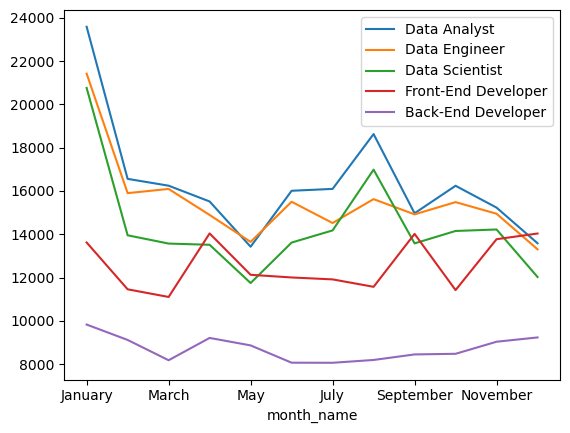

In [ ]:
final_df.plot(kind='line')

**Concatenation Of DataFrames**

In [1]:
import pandas as pd

# DataFrame 1
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie']
})

# DataFrame 2
df2 = pd.DataFrame({
    'ID': [4, 5, 6],
    'Name': ['David', 'Eve', 'Frank']
})

print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)


DataFrame 1:
   ID     Name
0   1    Alice
1   2      Bob
2   3  Charlie

DataFrame 2:
   ID   Name
0   4  David
1   5    Eve
2   6  Frank


In [5]:
pd.concat([df1,df2], ignore_index=True)

,ID,Name
0,1,Alice
1,2,Bob
2,3,Charlie
3,4,David
4,5,Eve
5,6,Frank


In [ ]:
# dict_months={'Jan':df_jan,
#            'Feb':df_feb,
#            'Mar':df_mar,
#            'Apr':df_apr,
#            'May':df_may,
#            'Jun':df_jun,
#            'Jul':df_jul,
#            'Aug':df_aug,
#            'Sep':df_sep,
#            'Oct':df_oct,
#            'Nov':df_nov,
#            'Dec':df_dec}
df['job_posted_month']= df['job_posted_date'].dt.strftime('%b')
months= df['job_posted_month'].unique()
dict_months={month:df[df['job_posted_month']==month] for month in months}

In [ ]:
pd.concat(dict_months.values(), ignore_index=True)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun
1,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",Jun
2,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'...",Jun
3,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"['go', 'apl', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",Jun
4,Data Scientist,Data Scientist (DataLab Team),Anywhere,via LinkedIn,Full-time,True,Serbia,2023-06-27 13:46:46,False,False,Serbia,None,NaN,NaN,Semrush,['python'],{'programming': ['python']},Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Data Scientist,"Data Scientist, Advanced Motor Technology","Newark, CA",via Trabajo.org,Full-time,False,"California, United States",2023-05-30 06:02:25,False,True,United States,None,NaN,NaN,Lucid Motors,"['go', 'python', 'sql', 'matlab', 'numpy', 'pa...","{'libraries': ['numpy', 'pandas', 'scikit-lear...",May
785737,Machine Learning Engineer,Data Scientist/Machine Learning Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-05-26 06:47:23,False,False,Czechia,None,NaN,NaN,StartupJobs,"['python', 'azure']","{'cloud': ['azure'], 'programming': ['python']}",May
785738,Software Engineer,New Product Analyst,Hong Kong,via Trabajo.org,Full-time,False,Hong Kong,2023-05-08 06:35:27,True,False,Hong Kong,None,NaN,NaN,ALD Automotive France,None,None,May
785739,Software Engineer,Software Engineer Level 3,"Gothenburg, Sweden",via Trabajo.org,Full-time,False,Sweden,2023-05-03 06:30:34,False,False,Sweden,None,NaN,NaN,Dabster Systems,"['c++', 'aws']","{'cloud': ['aws'], 'programming': ['c++']}",May


In [ ]:
type(dict_months.values())

dict_values

In [ ]:
df_q1= pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']], ignore_index=True)


<Axes: xlabel='job_posted_month'>

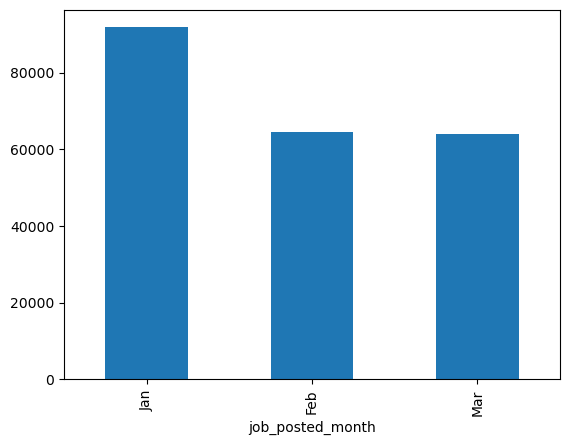

In [ ]:
df_q1['job_posted_month'].value_counts().plot(kind='bar')

**JOB TYPES**

In [ ]:
df['job_title_short'].unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [ ]:
dict_types={title: df[df['job_title_short']==title] for title in df['job_title_short'].unique()}

In [ ]:
df_analyst = pd.concat([dict_types['Data Analyst'], dict_types['Business Analyst'], dict_types['Senior Data Analyst']], ignore_index=True)

<Axes: ylabel='job_title_short'>

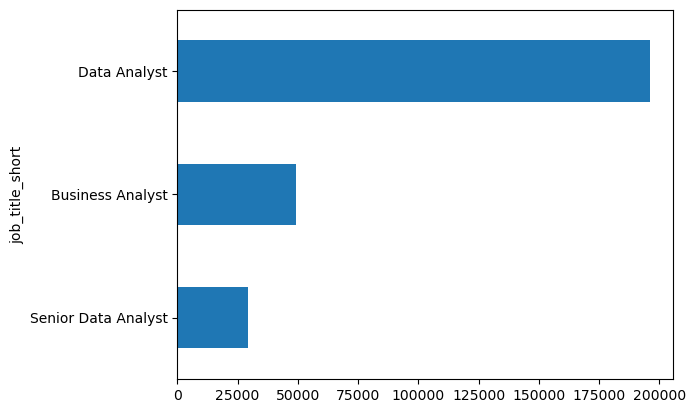

In [ ]:
df_analyst.groupby('job_title_short').size().sort_values().plot(kind='barh')